In [21]:
from random import gauss
from random import seed
from pandas import Series
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
import sklearn
import functionList

In [26]:
l = 150
eSeriesX = np.zeros((5,l))

for i in range(5):
    seed(i)
    series = [gauss(0.0, 1.0) for i in range(l)]
    eSeriesX[i,:] = Series(series)


In [27]:
#Creating simulated data, ignore this part
X = np.zeros((5,l))
for i in range(l):
    X[0,i] = .95*np.sqrt(2)*X[0,i-1] - .9025*X[0,i-2] + eSeriesX[0,i]
    X[1,i] = .5*X[0,i-2] + eSeriesX[1,i]
    X[2,i] = -.4*X[0,i-3] + eSeriesX[2,i]
    X[3,i] = -.5*X[0,i-2] + .25*np.sqrt(2)*X[3,i-1] + .25*np.sqrt(2)*X[4,i-1] + eSeriesX[3,i]
    X[4,i] = -.25*np.sqrt(2)*X[3,i-1] + .25*np.sqrt(2)*X[4,i-1] + eSeriesX[4,i]
X = np.transpose(X)
    

In [28]:
#Look at this part

#this is setting up the parameter sweep
memVec =  [1, 2, 4, 8, 12, 16, 20]
ridgeVec = [.1, 1, 5] 
cvNum = 10
error = np.zeros((len(memVec),len(ridgeVec),cvNum))

for L in ridgeVec: #loop over lambdas
    ridgeNormal = L*l #normalize the regularizer parameter
    for memNumber in memVec: #loop over memory points
        featureMat = functionList.buildFeatureMat(X,memNumber) #creates a feature vector
        cvLam = sklearn.model_selection.KFold(n_splits=10) #create cv splits
        cvRun = 0
        for train, test in cvLam.split(featureMat):
            pred = functionList.predRrOutput(featureMat[train,:], featureMat[test,:], X[train], ridgeNormal, 0)
            err = functionList.findMSE(pred, X[test])
            error[memVec.index(memNumber), ridgeVec.index(L), cvRun] = err
            cvRun = cvRun + 1
errNoCv = np.mean(error,2) #averages it out for all cv runs

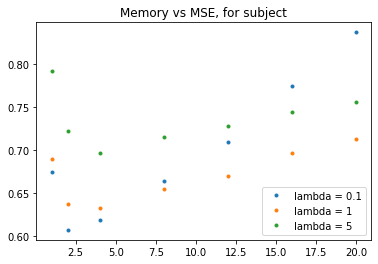

In [29]:
titleString = f"Memory vs MSE, for subject"
plt.title(titleString)
for i in range(len(ridgeVec)):
    plt.plot(memVec[:], errNoCv[:, i], ".", label = f"lambda = {ridgeVec[i]}") ## figure out columns to pass
plt.legend()
plt.show()